In [ ]:
# Importing necessary libraries #

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [5]:
# Loading the dataset #

In [20]:
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [7]:
# Date conversion and Sorting #

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [75]:
df = df.sort_index()
df.tail(10)

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,DayType,Month,DayOfWeek
Date,,,,,,,,,
2024-09-20,485,2537,0,440,37,0.0,Weekday,9,Friday
2024-09-21,28,832,0,64,0,NaN,Weekend,9,Saturday
2024-09-22,21,577,0,49,0,0.0,Weekend,9,Sunday
2024-09-23,56,1938,0,67,10,0.0,Weekday,9,Monday
2024-09-24,36,78,0,21,3,NaN,Weekday,9,Tuesday
2024-09-25,21,0,1,10,8,NaN,Weekday,9,Wednesday
2024-09-26,9,0,0,0,2,NaN,Weekday,9,Thursday
2024-09-27,6,0,0,13,0,NaN,Weekday,9,Friday
2024-09-28,1,0,0,4,0,NaN,Weekend,9,Saturday


In [ ]:
# Missing Values #

In [10]:
df.isna().sum()

Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [ ]:
# Basic data check #

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1898 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [32]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [33]:
# Service wise plots #

Text(0, 0.5, 'Passengers Count')

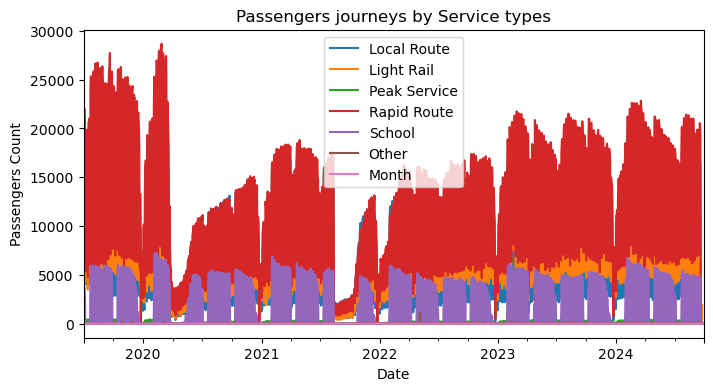

In [67]:
df.select_dtypes(include=['number']).plot(figsize=(8,4))
plt.title("Passengers journeys by Service types")
plt.xlabel("Date")
plt.ylabel("Passengers Count")

In [ ]:
# Passenger demand is significantly higher on weekdays than weekends # 

In [47]:
df['DayType'] = np.where(df.index.weekday < 5 , 'Weekday' , 'Weekend')
weekday_weekend_avg = df.groupby('DayType').mean()
weekday_weekend_avg

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
DayType,,,,,,
Weekday,12755.348175,8355.815328,251.413869,15297.278102,3293.729197,53.274669
Weekend,2731.512774,4294.523723,0.000000,5847.051095,0.109489,18.533333


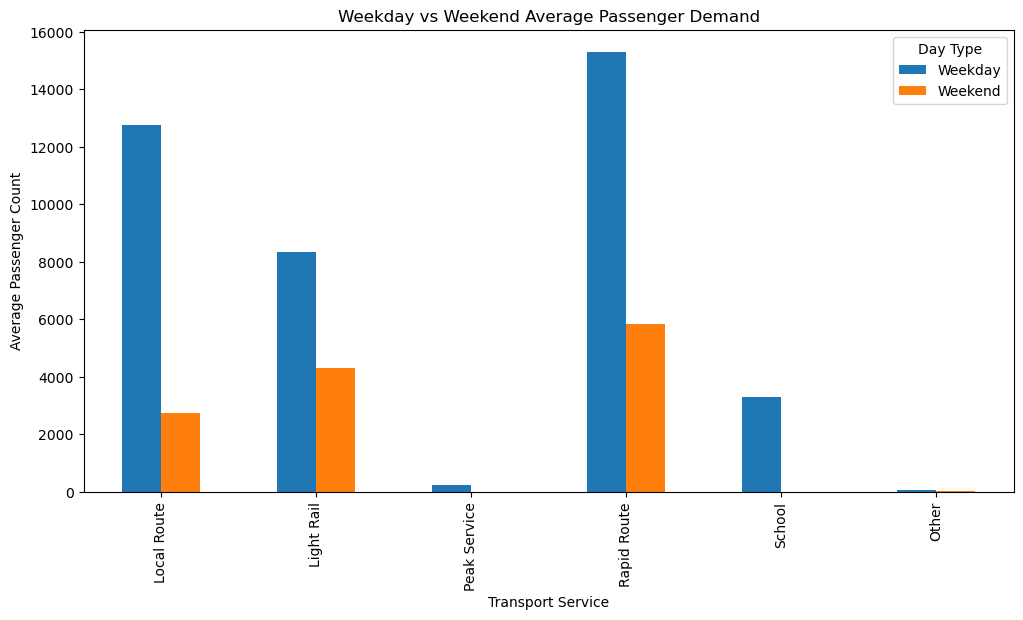

In [59]:
weekday_weekend_avg.T.plot(kind='bar', figsize=(12,6))
plt.title("Weekday vs Weekend Average Passenger Demand")
plt.xlabel("Transport Service")
plt.ylabel("Average Passenger Count")
plt.legend(title="Day Type")
plt.show()

In [ ]:
# School service demand is strongly dependent on academic schedules #

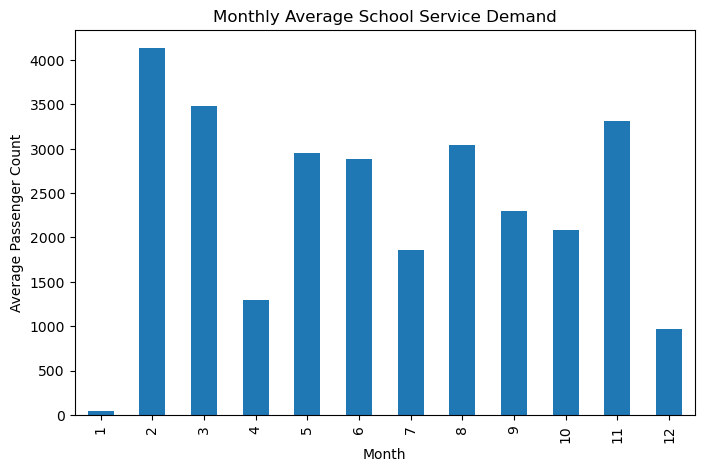

In [61]:
df['Month'] = df.index.month
monthly_school_avg = df.groupby('Month')['School'].mean()
monthly_school_avg.plot(kind='bar', figsize=(8,5))
plt.title("Monthly Average School Service Demand")
plt.xlabel("Month")
plt.ylabel("Average Passenger Count")
plt.show()


In [ ]:
# Peak services exhibit higher day-to-day demand variability #

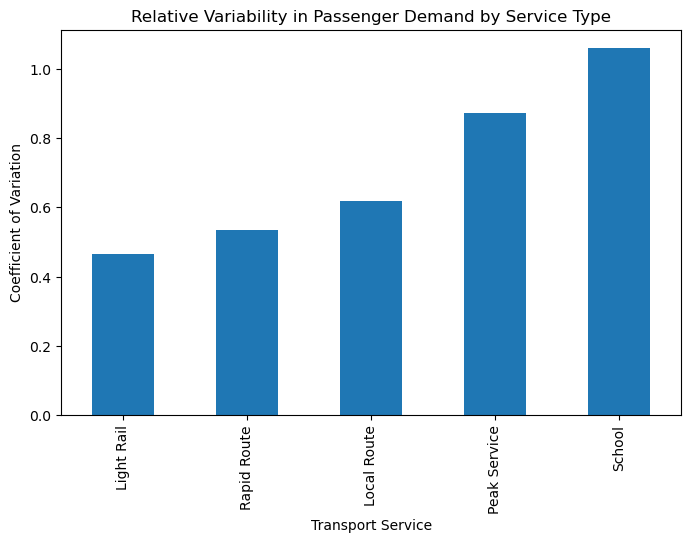

In [63]:
numeric_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
service_variability = df[numeric_cols].std() / df[numeric_cols].mean()
plt.figure(figsize=(8,5))
service_variability.sort_values().plot(kind='bar')
plt.title("Relative Variability in Passenger Demand by Service Type")
plt.xlabel("Transport Service")
plt.ylabel("Coefficient of Variation")
plt.show()


In [ ]:
# Passenger demand follows a consistent weekly seasonal pattern #

<Figure size 800x400 with 0 Axes>

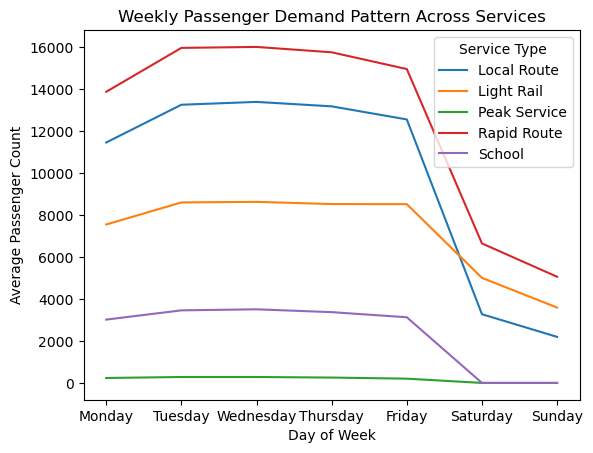

In [69]:
df['DayOfWeek'] = df.index.day_name()

weekly_pattern = df.groupby('DayOfWeek')[numeric_cols].mean()
weekly_pattern = weekly_pattern.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
    'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8,4))
weekly_pattern.plot()
plt.title("Weekly Passenger Demand Pattern Across Services")
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.legend(title="Service Type")
plt.show()


In [ ]:
# Local Route and Light Rail services show stable long-term demand trends #

<Figure size 1000x600 with 0 Axes>

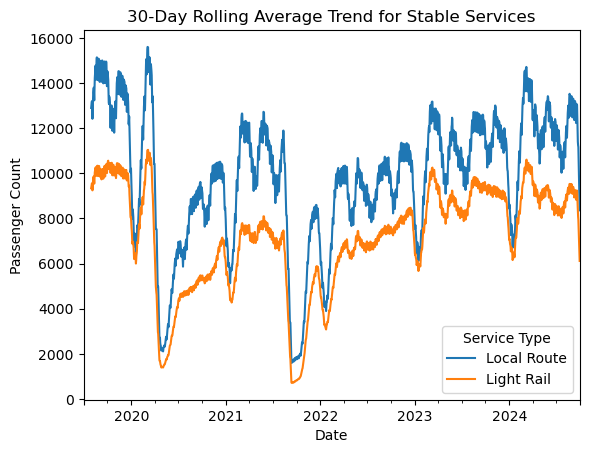

In [73]:
rolling_mean = df[numeric_cols].rolling(window=30).mean()

plt.figure(figsize=(10,6))
rolling_mean[['Local Route', 'Light Rail']].plot()
plt.title("30-Day Rolling Average Trend for Stable Services")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend(title="Service Type")
plt.show()